In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
# Loading the CSV file

try:
  df=pd.read_csv(r"/content/Transactions Dataset - transactions.csv")
except:
  prnt("Error")

In [36]:
df.head()

,id,customer,region,amount,category,date,is_premium
0,1,John,South,271.780,Sports,2025-08-13,True
1,2,Kevin,South,2367.555,Furniture,2024-06-27,True
2,3,Jacqueline,East,3415.700,Books,2024-09-23,False
3,4,Nicholas,North,2367.555,Groceries,2023-09-11,False
4,5,Jennifer,West,2893.020,Groceries,2024-03-02,True


In [35]:
# finding data types of data frame
df.dtypes

,0
id,int64
customer,object
region,object
amount,float64
category,object
date,datetime64[ns]
is_premium,bool


In [15]:
#  handling missing or invalid data, especially in the amount and date fields.
df.isnull().sum()

,0
id,0
customer,0
region,0
amount,68
category,0
date,0
is_premium,0


In [27]:
# Converting amount to numeric values
df['amount'] = pd.to_numeric(df['amount'], errors='coerce')


In [30]:
# Filling missing amounts with median
df['amount'].fillna(df['amount'].median(), inplace=True)

df

/tmp/ipython-input-1472455111.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['amount'].fillna(df['amount'].median(), inplace=True)


,id,customer,region,amount,category,date,is_premium
0,1,John,South,271.780,Sports,2025-08-13,True
1,2,Kevin,South,2367.555,Furniture,2024-06-27,True
2,3,Jacqueline,East,3415.700,Books,2024-09-23,False
3,4,Nicholas,North,2367.555,Groceries,2023-09-11,False
4,5,Jennifer,West,2893.020,Groceries,2024-03-02,True
...,...,...,...,...,...,...,...
695,696,Sherry,North,2611.350,Clothing,2024-06-10,True
696,697,Thomas,East,476.240,Clothing,2024-02-23,True
697,698,Joseph,North,751.190,Groceries,2025-05-23,True
698,699,Susan,North,3969.440,Sports,2025-07-20,True


In [31]:
# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Drop rows with invalid dates
df.dropna(subset=['date'], inplace=True)

df

,id,customer,region,amount,category,date,is_premium
0,1,John,South,271.780,Sports,2025-08-13,True
1,2,Kevin,South,2367.555,Furniture,2024-06-27,True
2,3,Jacqueline,East,3415.700,Books,2024-09-23,False
3,4,Nicholas,North,2367.555,Groceries,2023-09-11,False
4,5,Jennifer,West,2893.020,Groceries,2024-03-02,True
...,...,...,...,...,...,...,...
695,696,Sherry,North,2611.350,Clothing,2024-06-10,True
696,697,Thomas,East,476.240,Clothing,2024-02-23,True
697,698,Joseph,North,751.190,Groceries,2025-05-23,True
698,699,Susan,North,3969.440,Sports,2025-07-20,True


In [32]:
# converting is_premium into boolean
df['is_premium'] = df['is_premium'].astype(bool)

df

,id,customer,region,amount,category,date,is_premium
0,1,John,South,271.780,Sports,2025-08-13,True
1,2,Kevin,South,2367.555,Furniture,2024-06-27,True
2,3,Jacqueline,East,3415.700,Books,2024-09-23,False
3,4,Nicholas,North,2367.555,Groceries,2023-09-11,False
4,5,Jennifer,West,2893.020,Groceries,2024-03-02,True
...,...,...,...,...,...,...,...
695,696,Sherry,North,2611.350,Clothing,2024-06-10,True
696,697,Thomas,East,476.240,Clothing,2024-02-23,True
697,698,Joseph,North,751.190,Groceries,2025-05-23,True
698,699,Susan,North,3969.440,Sports,2025-07-20,True


In [48]:
# Compute summary statistics for amount (mean, median, count, etc.).
df.describe()

,id,amount
count,700.00000,632.000000
mean,350.50000,2493.308766
std,202.21688,1404.270409
min,1.00000,105.660000
25%,175.75000,1291.722500
50%,350.50000,2367.555000
75%,525.25000,3700.927500
max,700.00000,4994.390000


In [22]:
# Identyfying unique customer regions

unique_regions = df['region'].unique()
print("Unique Customer Regions:", unique_regions)

Unique Regions: ['South' 'East' 'North' 'West']


In [38]:
# Filtering customers by their regions
def filter_region(region):
    return df[df['region'] == region]

south_customers = filter_region("South")
south_customers


,id,customer,region,amount,category,date,is_premium
0,1,John,South,271.780,Sports,2025-08-13,True
1,2,Kevin,South,2367.555,Furniture,2024-06-27,True
18,19,David,South,3058.610,Electronics,2024-06-05,True
23,24,Jorge,South,864.990,Groceries,2023-12-02,False
41,42,Stefanie,South,4230.260,Groceries,2024-05-10,False
...,...,...,...,...,...,...,...
680,681,Trevor,South,3020.740,Furniture,2024-06-22,False
683,684,Glen,South,2149.340,Sports,2024-01-25,True
686,687,Juan,South,2367.555,Clothing,2025-08-04,False
693,694,Ashley,South,4625.840,Groceries,2024-04-29,True


In [24]:
# Grouping data by category and calculating total spend per product category.

category_spent = df.groupby('category')["amount"].sum()


category_spent.sort_values(by='amount', ascending=False)


,category,amount
1,Clothing,279458.770
2,Electronics,270631.055
4,Groceries,270429.015
3,Furniture,262500.750
6,Toys,231027.480
0,Books,230859.525
5,Sports,191858.285


In [42]:
# Implement an efficient fi ltering mechanism for transactions based on user input criteria (e.g., date range, amount).


def filter_transactions(transactions,start_date,end_date,min_amount,max_amount):
  filtered_transactions=transactions[(transactions['date']>=start_date)&(transactions['date']<=end_date)&(transactions['amount']>=min_amount)&(transactions['amount']<=max_amount)]


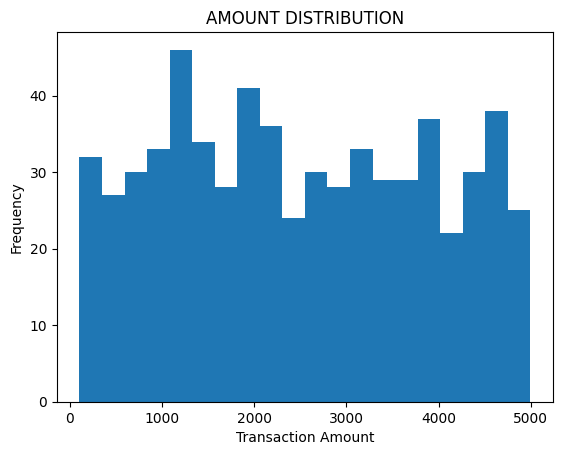

In [49]:
#Generate a histogram of transaction amounts.
plt.hist(df["amount"],bins=20)
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.title("AMOUNT DISTRIBUTION")
plt.show()

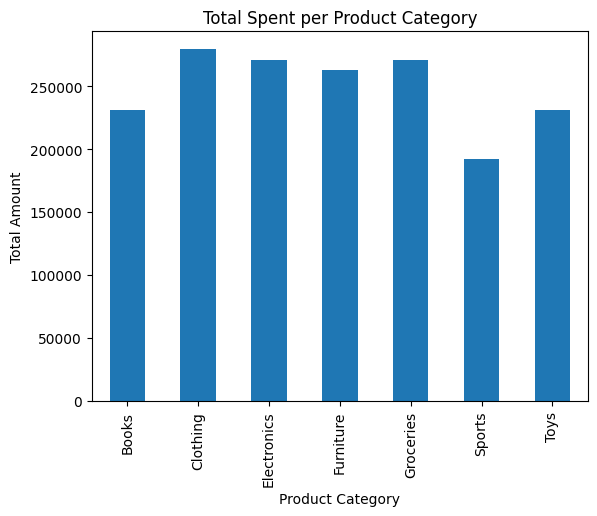

In [46]:
#Create a bar chart illustrating total spend per product category

sum_category=df.groupby("category")["amount"].sum()
sum_category.plot(kind="bar")

plt.xlabel("Product Category")
plt.ylabel("Total Amount")
plt.title("Total Spent per Product Category")
plt.show()
